In [1]:
import sys       ###kfinit（ノートブック全体）
sys.path.append('../scripts/')
from mcl import *

<IPython.core.display.Javascript object>


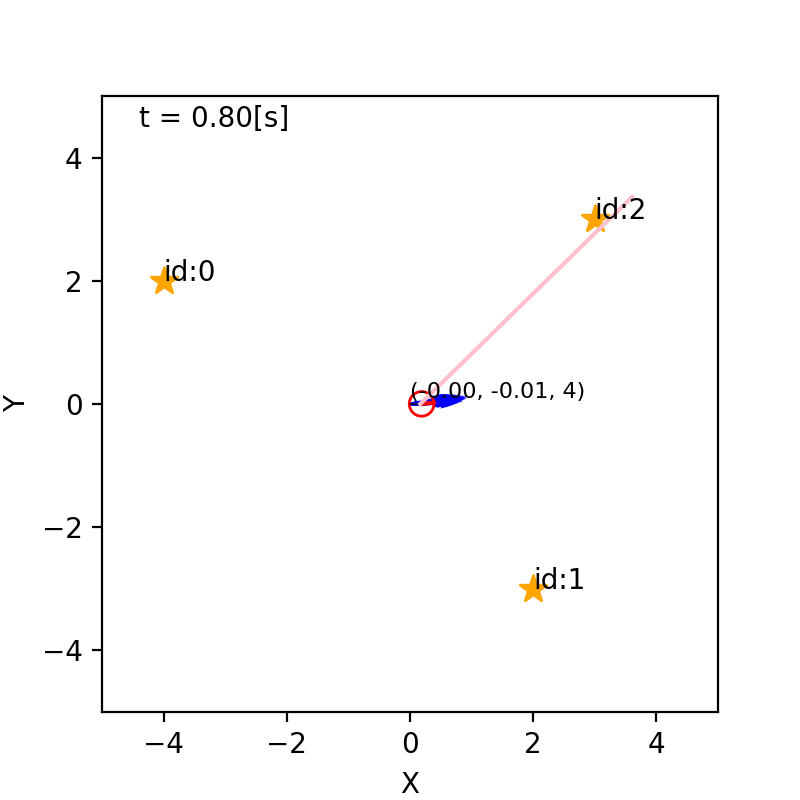

In [2]:
def trial():
    time_interval = 0.1
    world = World(30, time_interval, debug=False) 

    ### 地図を生成して3つランドマークを追加 ###
    m = Map()
    for ln in [(-4,2), (2,-3), (3,3)]: m.append_landmark(Landmark(*ln))
    world.append(m)          

    ### ロボットを作る ###
    initial_pose = np.array([0, 0, 0]).T
    estimator = Mcl(m, initial_pose, 100)          #とりあえずMCLを動かしておきましょう
    a = EstimationAgent(time_interval, 0.2, 10.0/180*math.pi, estimator)
    r = Robot(initial_pose, sensor=Camera(m), agent=a, color="red")
    world.append(r)

    world.draw()
    
trial()